Time series anaysis on the data International Airline passengers
from 1940 to 1960

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
df = pd.read_csv("AirPassengers.csv")
df.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


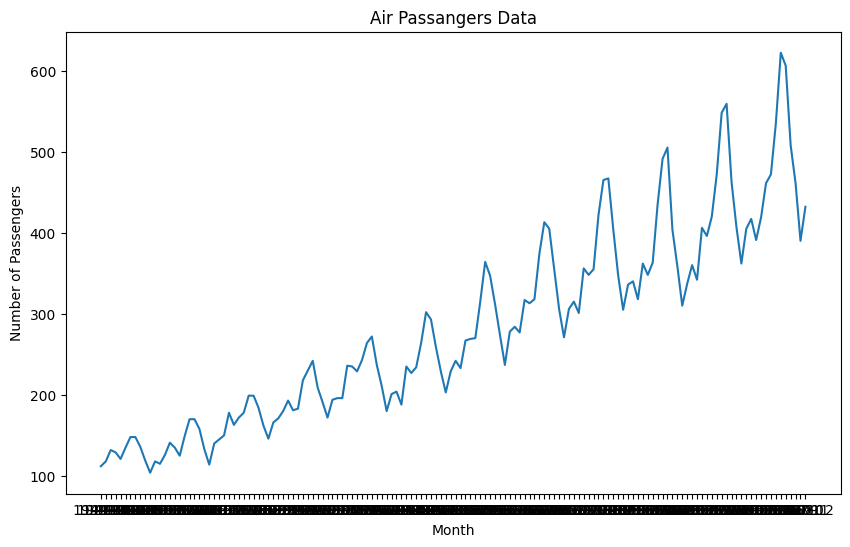

In [4]:
# plot this data to see trends and seasonality
plt.figure(figsize=(10,6))
plt.plot(df["Month"], df["#Passengers"])
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Air Passangers Data")
plt.show()

<Axes: xlabel='Month', ylabel='#Passengers'>

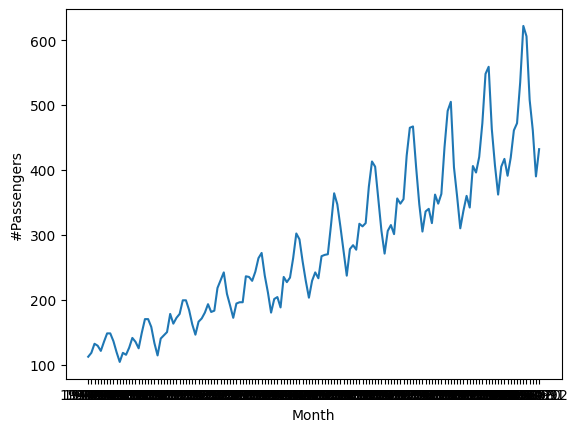

In [5]:
#same plot through sns
sns.lineplot(x="Month", y="#Passengers", data=df)

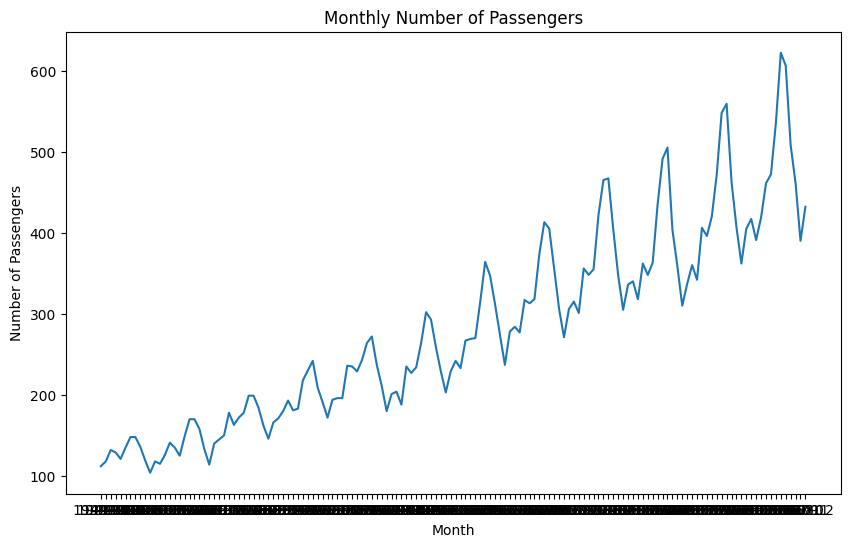

In [6]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df["Month"], df["#Passengers"])

# Adding title and labels
plt.title("Monthly Number of Passengers")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")

# Show the plot
plt.show()

In [7]:
df.shape
#144 data points


(144, 2)

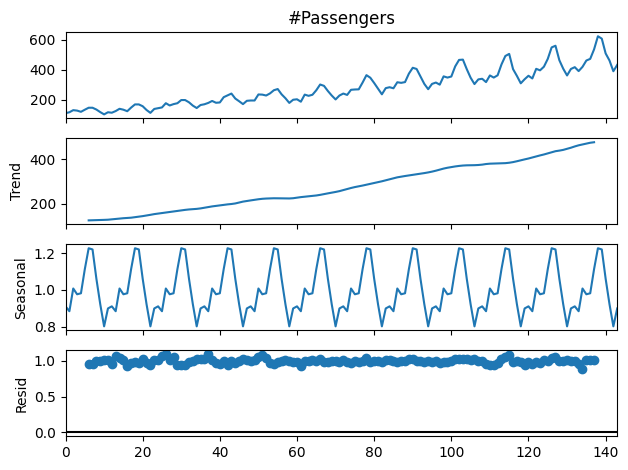

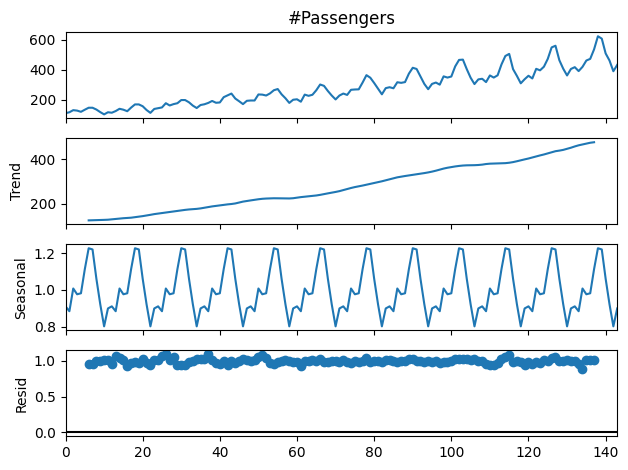

In [8]:
#decompose in diff sets
#decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df["#Passengers"], model="multiplicative", period=12)
decompose.plot()


#trend >> general line(here trend is in increasing order means trend during this time has been upwards)

#seasonality >>> variation in data at a specific time point
                 #specific variations at specific intervals
#residual >> errors


In [9]:
# save
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid



<Axes: >

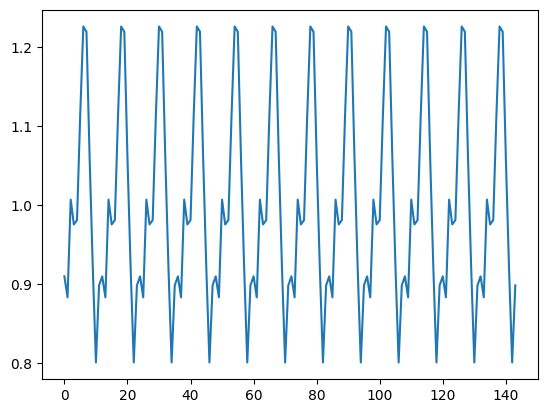

In [10]:
decompose.seasonal.plot()  #sep plot

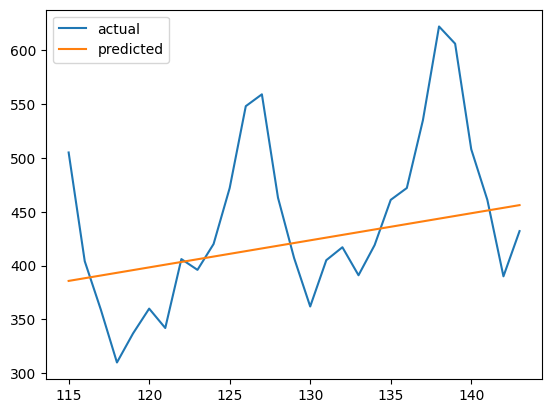

In [11]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

#fit a simple linear regression model on the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train.index.values.reshape(-1, 1), train["#Passengers"])  
#index import. in Timeseriesdata it shows time

#make predictions on the testing set
predictions = model.predict(test.index.values.reshape(-1, 1))

#plot the actual and predicted values
plt.plot(test.index, test["#Passengers"], label="actual")
plt.plot(test.index, predictions, label="predicted")
plt.legend()
plt.show()



In [ ]:
#not a good prediction we will try using diff models so to reduce 
#the diff between predicted and actual
#or we can use neural networks


In [12]:
df.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Keras version: 3.5.0
TensorFlow version: 2.17.0


d:\datascienceprojects\timeseriesanalysis_practice\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1394.2471 - root_mean_squared_error: 37.2991
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 963.0170 - root_mean_squared_error: 30.9403  
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 836.2784 - root_mean_squared_error: 28.5233  
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 540.2188 - root_mean_squared_error: 23.2265 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 542.2207 - root_mean_squared_error: 23.2512  
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 386.8418 - root_mean_squared_error: 19.6026  
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 370.5610 - root_mean_squared_error: 19.2372 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 374.1039 - root_mean_squared_error: 19.3272 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 392.7740 - root_mean_squared_error: 19.7709 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

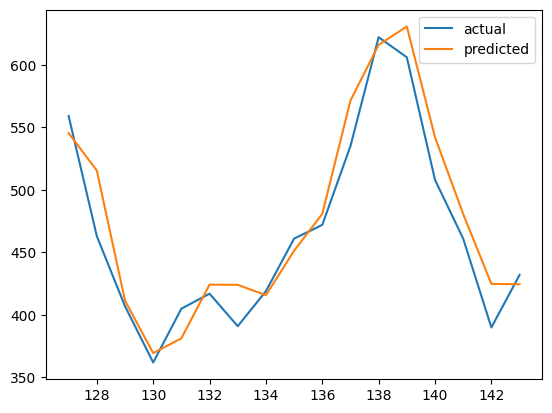

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["#Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["#Passengers"].values[n_lags:])
X_test = np.array([test["#Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["#Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["#Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()

X_train shape: (103, 12)
y_train shape: (103,)


ValueError: object __array__ method not producing an array

In [28]:


# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["#Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()

d:\datascienceprojects\timeseriesanalysis_practice\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: object __array__ method not producing an array